# Packages 

In [1]:
import pandas as pd # pandas package
pd.options.display.max_columns = 30

import numpy as np # numpy package

# matplotlib packages
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

import seaborn as sns # seaborn package

import warnings  # warnings package
warnings.filterwarnings('ignore')

# plotly packages
from chart_studio import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot

# cufflink packages
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

# interactive shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from pathlib import Path # path package
import re #regex package
from textblob import TextBlob #import textblob package

# word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Load Data set

In [2]:
# load the merged data set into pandas
df = pd.read_csv(Path(r"../Data/Merged Data/merged_data.csv"))

# sample only 5 rows
df.sample(5)

review_title  \
12389            Waste of $50!   
4024                     Alexa   
13873  They changed the remote   
2405        Very User Friendly   
7386          Love love love!!   

                                             review_text         review_star  \
12389  I purchased this on May 2, and it was delivere...  1.0 out of 5 stars   
4024                                   the fire tv is ok  5.0 out of 5 stars   
13873  I DONT LIKE that they changed the remote to ha...  1.0 out of 5 stars   
2405    Easy plug and play and user friendly. Convenient  5.0 out of 5 stars   
7386   Love love love! Easy to use. Picture and sound...  5.0 out of 5 stars   

                                                    date        author  page  \
12389     Reviewed in the United States on June 12, 2020        jawz33   239   
4024    Reviewed in the United States on January 4, 2022        Fabian   403   
13873  Reviewed in the United States on February 3, 2021  April Magyar   388   
2405   Reviewed in the United States on November 24, ...          Josh   241   
7386     Reviewed in the United States on April 30, 2020        Johnny   239   

                    product  
12389           Roku Remote  
4024   Amazon Fire TV Stick  
13873           Roku Remote  
2405   Amazon Fire TV Stick  
7386      Google ChromeCast

# Pre-cleaning 

1. Remove the rows where `review_text` column were missing
2. Fix `review_star` to have numeric value of ratings 
3. fix `date` to be parsed and converted into datetime object
4. Make suring we have actual string dtype columns
5. Convert `review_title`, `review_text`, `author`, and `product` to string types
6. Adding Sentiment Polarity Scores for `review_text` as a new column `polarity`
7. Adding Length of Reviews as a new column `review_len`
8. Adding the Word Count in each Reviews as a new column `word_count`


## Remove missing values in `review_text`

In [3]:
# original data frame dimensions before removing null values in `review_text`
df.shape

(17740, 7)

In [4]:
# remove null values in `review_text`
df = df[~df['review_text'].isnull()]

# data frame dimensions after removing null values
df.shape

(17696, 7)

## Cleaning `review_star`

In [5]:
## extract rating from strings and convert to float type
df['review_star'] = df['review_star'].apply(lambda x: re.findall(r'^[0-9]\.[0-9]?', x)[0]).astype(float)

# sample only 5 rows
df['review_star'].sample(5)


2191    5.0
3408    5.0
5750    5.0
1470    5.0
1998    5.0
Name: review_star, dtype: float64

## Cleaning `date`

In [6]:
# clean date of reviews to parse the actual date and convert to date-time object 
df['date'] = pd.to_datetime(df['date'].apply(lambda x: re.findall(r'(?<=on\ ).*', x)[0])).dt.strftime('%m-%d-%Y')

# sample only 5 rows
df['date'].sample(5)

10550    04-29-2022
1340     03-13-2022
14748    03-08-2020
6886     03-27-2019
12608    01-16-2018
Name: date, dtype: object

## Convert `review_title`, `review_text`, `author`, and `product` to string types

In [7]:
# convert review title column into string type
df['review_title'] = df['review_title'].astype("string")

# convert review text column into string type
df['review_text'] = df['review_text'].astype("string")

# convert author column into string type
df['author'] = df['author'].astype("string")

# convert product column into string type
df['product'] = df['product'].astype("string")

## Adding Sentiment Polarity Scores as `polarity`

In [8]:
# create new column for sentiment polarity scores
df['polarity'] = df['review_text'].map(lambda text: TextBlob(text).sentiment.polarity)

# sample only 5 rows
df['polarity'].sample(5)

14397    0.186837
7934     0.000000
17577   -0.100000
1859     0.700000
818      0.500000
Name: polarity, dtype: float64

### Preview 5 randomly selected reviews with the highest sentiment polarity score

In [9]:
# Print statement
print('5 random reviews with the highest positive sentiment polarity: \n')

# Randomly sample review texts with highest positive sentiment polarity scores
cl = df.loc[df.polarity == 1, ['review_text']].sample(5).values

# print out each one
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Perfect, the best
Perfect!
The best way to pair my phone with my TV.
As promised. Ease of use and excellent reception
perfect


### Preview 5 randomly selected reviews with the most neutral sentiment polarity score

In [10]:
# Print statement
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')

# Randomly sample review texts with highest neutral sentiment polarity scores
cl = df.loc[df.polarity == 0, ['review_text']].sample(5).values

# print out each one
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Hace todo lo que debe de hacer y es muy fácil de usar
CUMPLE CON LO PROMETIDO
tengo un año con el y me ha funcionado sin dificultad
To sensitive.....very touchy
Works as expected!I’m using this device for about 3 mo the now with no issues and can definitely recommend it!


### Preview 5 randomly selected reviews with the most negative sentiment polarity score

In [11]:
# Print Statement
print('5 reviews with the most negative polarity: \n')

# Randomly sample review texts with highest negative sentiment polarity scores
cl = df.loc[df.polarity <= -1.0, ['review_text']].sample(5).values

# Print out each one
for c in cl:
    print(c[0])

5 reviews with the most negative polarity: 

Terrible
Customer service doesn't exist, I bought 3 of these pieces of CRAP for $50.00 and now they are going for $30.00Find some thing else to spend your money on. You can't believe the reviews. Roku will play you for a sap!!
Keeps on hanging , terrible experience.
No mute button WTF!!!!!!!!!!
This is the worst product I ever purchased and I also returned it setting it up is a nightmare


## Adding Length of Reviews as `review_len`

In [12]:
# create new column called review_len for length of reviews
df['review_len'] = df['review_text'].astype(str).apply(len)

# sample only 5 rows
df['review_len'].sample(5)

6342     102
875       60
16662     57
15047    579
3876      56
Name: review_len, dtype: int64

## Adding the Word Count in each Reviews as `word_count`

In [13]:
# create new column called word count for number of words in each reviews
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))

# sample only 5 rows
df['word_count'].sample(5)

294      49
11725     6
243      55
5704     13
4216      2
Name: word_count, dtype: int64

## Re-examine data now

In [14]:
# preview new clean columns with only 10 samples
df.sample(10)

review_title  \
17060                                    Apple TV   
13924                 WAY BETTER THAN AMAZON FIRE   
11877                                 Outstanding   
8682                                   #allgoogle   
14604                          Just what I wanted   
8199                            Amo este producto   
8702   Best purchase I have ever made on amazon!!   
16917                                       Great   
11126                              Great product!   
9648                     La señal no es constante   

                                             review_text  review_star  \
17060  disliked because the remote did not work, coul...          1.0   
13924  THIS IS SO MUCH BETTER THAN THE AMAZON FIRE ST...          5.0   
11877                                  Very good product          5.0   
8682   Chrome cast is awesome. For google music and c...          5.0   
14604  Love this. Bought it specifically because we l...          5.0   
8199   Mantiene su calidad en el cambio de generacion...          5.0   
8702   This has been the best thing I’ve ever bought ...          5.0   
16917  I’d like the picture quality a lot, it is incr...          5.0   
11126  Really recommend this one over the regular one...          5.0   
9648           Tiene problemas con la señal muchas veces          5.0   

             date                    author  page            product  \
17060  12-18-2019                   Rhemata   207           Apple TV   
13924  04-16-2021                 Schmoozie   393        Roku Remote   
11877  01-07-2020                   Nick K.   188        Roku Remote   
8682   01-28-2020                  Jason L.   369  Google ChromeCast   
14604  07-04-2020           Spurling Family   461        Roku Remote   
8199   01-15-2020                    kilsys   320  Google ChromeCast   
8702   12-29-2019  Laura Elizabeth Lunsford   371  Google ChromeCast   
16917  08-20-2018                   roberta   192           Apple TV   
11126  07-02-2020              Albert Lopez   113        Roku Remote   
9648   02-15-2020               Gelphy Cruz   465  Google ChromeCast   

       polarity  review_len  word_count  
17060 -0.150000          89          17  
13924  0.065816         295          56  
11877  0.910000          17           3  
8682   1.000000          52           9  
14604  0.410556         225          44  
8199   0.000000          88          13  
8702   0.425000         223          42  
16917  0.000000          52          10  
11126  0.066667          85          16  
9648   0.000000          41           7

# Exploratory Data Analysis 

1. Examine a five-number summary of the numerical and categorical columns
2. Checking for Missing Data
3. Univariate Analysis
    
    - Distribution of review sentiment polarity score
    - Distribution of review ratings
    - Distribution of review lengths
    - Distribution of review word counts
    - Distribution of products
    

4. Multivariate Analysis
    
    - Sentiment Polarity Boxplot of Products
    - Product Ratings Bar Graph
    - Review Length Box-plot by Product
    - Word Count Box-plot by Product
    - 2D Density jointplot of Rating and Sentiment Polarity
    - Word Cloud of Reviews

## 1. Examine a five-number summary of the numerical and categorical columns

In [15]:
# 5 number summary of the numerical columns
df.describe().T

count        mean         std  min         25%     50%    75%  \
review_star  17696.0    4.479204    1.185062  1.0    5.000000    5.00    5.0   
page         17696.0  232.748361  142.237177  1.0  111.000000  222.00  352.0   
polarity     17696.0    0.299442    0.309198 -1.0    0.025666    0.26    0.5   
review_len   17696.0  205.686370  337.735191  1.0   34.000000   91.00  248.0   
word_count   17696.0   38.499491   62.225447  1.0    6.000000   17.00   47.0   

                 max  
review_star      5.0  
page           500.0  
polarity         1.0  
review_len   10046.0  
word_count    1766.0

**Interpretation**


1. `review_star`: The range of the review ratings is 1 to 5 stars where the mean across all brands for streaming devices from this data set is 4.47.

2. `page`: The page number does not tell us much aside from that fact that we were able to scrape customer reviews from pages 1 to pages 500.

3. `polarity`: This is an interesting summary because the polarity sentiment score tells us on average we are seeing a 0.299 where -1.0 is the lowest and 1.0 is the highest. So typically on average, we are a bit past the neutral sentiment when looking at reviews on average.

4. `review_len`: This column specifies the length of each review, in this case on average we are seeing 205.68 characters per reviews with the least being 34 and max being 10,000 characters.

5. `word_count`: Where as the word count counts only words and on average there are 38.5 words per review with the least being 1 word and the most being 1,766 words.


**Looking at Categorical Columns**:

1. product

In [16]:
# summary statistic of products
df[['product']].describe().T

count unique          top  freq
product  17696      4  Roku Remote  5000

**Interpretation**

1. `product`: Since not all reviews were scraped equally from each brand and from our pre-cleaning work we also had to drop several rows with missing reviews, our new summary statistics of the `product` column tells us that `Roku Remote` product has the most reviews at 5000.

## 2. Checking for Missing Data


In [17]:
# check for total missing rows across all columns
df.isna().sum()

review_title    3
review_text     0
review_star     0
date            0
author          1
page            0
product         0
polarity        0
review_len      0
word_count      0
dtype: int64

**Interpretation**: 

1. Since the columns `review_title` and `author` contain very little missing values and also does not impact the modeling phase later on, we will still keep these rows

## 3. Univariate Analysis

- Distribution of review sentiment polarity score
- Distribution of review ratings
- Distribution of review lengths
- Distribution of review word counts
- Distribution of products

### Distribution of review sentiment polarity score

In [18]:
# plot review sentiment polarity scores with plotly
df['polarity'].iplot(
    kind='hist', # histogram
    bins = 50, # number of bins
    xTitle='Polarity', # xlabel
    color = "blue", # bar chart color
    linecolor='black', # bar chart line color
    yTitle='Count', # y label
    title='Sentiment Polarity Distribution') # title

**Interpretation**

1. The distribution seems to be left skewed with a longer left tail and the rest of the distribution is clustered around the positive polarity sentiment scores with a noticable peak at 0 or neutral.

### Distribution of review ratings


In [19]:
# create a data frame to count the number of customer reviews by products and also rename a column as count
rating_counts = pd.DataFrame(df[['review_star']].value_counts()).reset_index().rename( \
    columns={'review_star': 'Ratings', 0:'count'})

# add a sort index
rating_counts['Ratings_for_sorting'] = rating_counts['Ratings']

# convert ratings to str type for visualization
rating_counts['Ratings'] = rating_counts['Ratings'].astype(str)


# Sort order by custom column and display 
rating_counts.sort_values(by=['Ratings_for_sorting'], inplace = True)
rating_counts[['Ratings','count']]

Ratings  count
1     1.0   1309
4     2.0    564
3     3.0    671
2     4.0    946
0     5.0  14206

In [20]:
# use plotly to create a bar graph of number of reviews by brand and using customized color coding 
fig = px.bar(rating_counts, x="Ratings", y="count", color="Ratings", 
             title= "Customer Ratings", text_auto = '.2s', 
             color_discrete_map={'1.0':'red', '2.0':'orange', '3.0': 'yellow',
                                 '4.0':'rgb(179,226,205)', '5.0':'rgb(27,158,119)'})

# figure customization
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False,
 marker_line_width=1.5, opacity = 0.75)


**Interpretation**

1. As expected, ratings are dominated by the most satisfied customers who wants to leave the highest rating of 5/5 stars and very dissatisfied customers leaving poor ratings 1/5 and 2/5.

### Distribution of review lengths


In [21]:
# plot review lengths plotly
df['review_len'].iplot(
    kind='hist', # histogram
    bins = 200, # number of bins
    xTitle='Length', # xlabel
    color = "green", # bar chart color
    linecolor='black', # bar chart line color
    yTitle='Count', # y label
    title='Length of Reviews Distribution') # title

**Interpretation** 

1. A very right-skewed distribution with most reviews falling under 200 characters or less for the most counts.

### Distribution of review word counts

In [22]:
# plot review lengths plotly
df['word_count'].iplot(
    kind='hist', # histogram
    bins = 200, # number of bins
    xTitle='Words', # xlabel
    color = "orange", # bar chart color
    linecolor='black', # bar chart line color
    yTitle='Count', # y label
    title='Number of Words in Reviews Distribution') # title

**Interpretation**

1. A very right-skewed distribution with most reviews falling under 30 words or less per review for the most counts.

### Distribution of products

In [23]:
# create a data frame to count the number of customer reviews by products and also rename a column as count
product_counts = pd.DataFrame(df[['product']].value_counts()).reset_index().rename(columns={0:'count'})
product_counts

product  count
0           Roku Remote   5000
1     Google ChromeCast   4997
2  Amazon Fire TV Stick   4959
3              Apple TV   2740

In [24]:
# use plotly to create a bar graph of number of reviews by brand and using customized color coding 
fig = px.bar(product_counts, x="product", y="count", color="product", title= "Streaming Devices by Brands",
            color_discrete_map={'Roku Remote':'purple', 'Google ChromeCast': 'red', 'Amazon Fire TV Stick':'orange', 'Apple TV':'black'},
            text_auto = '.2s')

# figure customization
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False,
marker_line_width=1.5, opacity=0.75)

**Interpretation**

1. Originally, Apple TV was only able to scrape 2,740 reviews and this seems to still be the case.
2. However, since we removed rows where reviews were missing, we can check accordingly and see that 3 rows were missing reviews from Google ChromeCast and 41 rows were missing reviews from Amazon Fire TV Stick.

## Multivariate Analysis 

- Sentiment Polarity Boxplot of Products
- Product Ratings Bar Graph
- Review Length Box-plot by Product
- Word Count Box-plot by Product
- 2D Density jointplot of Rating and Sentiment Polarity
- Word Cloud of Reviews

    - For all reviews across products 
    - For Amazon Fire TV Stick reviews
    - For Google ChromeCast reviews
    - For Roku Remote reviews
    - For Apple TV reviews 

### Sentiment Polarity Boxplot of Products

In [25]:
# Amazon Fire TV Stick Polarities
amz = df.loc[df['product'] == 'Amazon Fire TV Stick']['polarity']

# Google ChromeCast Polarities
google = df.loc[df['product'] == 'Google ChromeCast']['polarity']

# Roku Remote Polarities
roku = df.loc[df['product'] == 'Google ChromeCast']['polarity']

# Google ChromeCast Polarities
apple = df.loc[df['product'] == 'Apple TV']['polarity']

# Draw Boxplot for Amazon Fire TV Stick
trace0 = go.Box(
    y=amz,
    name = 'Amazon Fire TV Stick',
    marker = dict(
        color = 'orange', opacity=0.75
    )
)

# Draw Boxplot for Google ChromeCast
trace1 = go.Box(
    y=google,
    name = 'Google ChromeCast',
    marker = dict(
        color = 'red', opacity=0.75
    )
)

# Draw Boxplot for Roku Remote
trace2 = go.Box(
    y=roku,
    name = 'Roku Remote',
    marker = dict(
        color = 'purple', opacity=0.75
    )
)


# Draw Boxplot for Apple TV
trace3 = go.Box(
    y=apple,
    name = 'Apple TV',
    marker = dict(
        color = 'black', opacity=0.75
    )
)


# Combine all boxplots into one layout
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Products"
)

# Plot all boxplots as one figure
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Products")

**Intepretation**

1. Most brands are displaying a median polarity score between 0.21-0.31, indicating that 50% of each product's reviews contain neutral sentiments. 
2. Althought there are a few bad apples for Apple TV and Rokue Remote reviews ranging below -0.70.

### Product Ratings Bar Graph

In [26]:
product_ratings = df.groupby(['product', \
                              'review_star']).size().reset_index().rename(columns = {'review_star':'Ratings', 
                                                                                     0:'Count', 'product':'Product'})
product_ratings['Ratings'] = product_ratings['Ratings'].astype(str)
product_ratings

Product Ratings  Count
0   Amazon Fire TV Stick     1.0     62
1   Amazon Fire TV Stick     2.0     32
2   Amazon Fire TV Stick     3.0     39
3   Amazon Fire TV Stick     4.0     43
4   Amazon Fire TV Stick     5.0   4783
5               Apple TV     1.0    311
6               Apple TV     2.0    170
7               Apple TV     3.0    197
8               Apple TV     4.0    233
9               Apple TV     5.0   1829
10     Google ChromeCast     1.0    515
11     Google ChromeCast     2.0    189
12     Google ChromeCast     3.0    265
13     Google ChromeCast     4.0    410
14     Google ChromeCast     5.0   3618
15           Roku Remote     1.0    421
16           Roku Remote     2.0    173
17           Roku Remote     3.0    170
18           Roku Remote     4.0    260
19           Roku Remote     5.0   3976

In [27]:
# use plotly to create a bar graph of number of reviews by brand and using customized color coding 
fig = px.bar(product_ratings, x="Product", y="Count", color="Ratings", title= "Product Ratings",
             color_discrete_map={'1.0':'red', '2.0':'orange', '3.0': 'yellow',
                                 '4.0':'rgb(179,226,205)', '5.0':'rgb(27,158,119)'},
            text_auto = '.2s', barmode='group')


# figure customization
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False,
marker_line_width=1.5, opacity = .85)

**Intepretation**

1. Overall, 5/5 star ratings are the most dominant class across all products and the second most counted rating is 1/5 stars.

### Review Length Box-plot by Product

In [28]:
# Amazon Fire TV Stick Review Length
amz = df.loc[df['product'] == 'Amazon Fire TV Stick']['review_len']

# Google ChromeCast Review Length
google = df.loc[df['product'] == 'Google ChromeCast']['review_len']

# Roku Remote Review Length
roku = df.loc[df['product'] == 'Google ChromeCast']['review_len']

# Google ChromeCast Review Length
apple = df.loc[df['product'] == 'Apple TV']['review_len']

# Draw Boxplot for Amazon Fire TV Stick
trace0 = go.Box(
    y=amz,
    name = 'Amazon Fire TV Stick',
    marker = dict(
        color = 'orange', opacity=0.75
    )
)

# Draw Boxplot for Google ChromeCast
trace1 = go.Box(
    y=google,
    name = 'Google ChromeCast',
    marker = dict(
        color = 'red', opacity=0.75
    )
)

# Draw Boxplot for Roku Remote
trace2 = go.Box(
    y=roku,
    name = 'Roku Remote',
    marker = dict(
        color = 'purple', opacity=0.75
    )
)


# Draw Boxplot for Apple TV
trace3 = go.Box(
    y=apple,
    name = 'Apple TV',
    marker = dict(
        color = 'black', opacity=0.75
    )
)


# Combine all boxplots into one layout
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Review Length Boxplot of Products"
)

# Plot all boxplots as one figure
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Review Length Boxplot of Products")

### Word Count Boxplot by Product 

In [29]:
# Amazon Fire TV Stick Word Count
amz = df.loc[df['product'] == 'Amazon Fire TV Stick']['word_count']

# Google ChromeCast Word Count
google = df.loc[df['product'] == 'Google ChromeCast']['word_count']

# Roku Remote Word Count
roku = df.loc[df['product'] == 'Google ChromeCast']['word_count']

# Google ChromeCast Word Count
apple = df.loc[df['product'] == 'Apple TV']['word_count']

# Draw Boxplot for Amazon Fire TV Stick
trace0 = go.Box(
    y=amz,
    name = 'Amazon Fire TV Stick',
    marker = dict(
        color = 'orange', opacity=0.75
    )
)

# Draw Boxplot for Google ChromeCast
trace1 = go.Box(
    y=google,
    name = 'Google ChromeCast',
    marker = dict(
        color = 'red', opacity=0.75
    )
)

# Draw Boxplot for Roku Remote
trace2 = go.Box(
    y=roku,
    name = 'Roku Remote',
    marker = dict(
        color = 'purple', opacity=0.75
    )
)


# Draw Boxplot for Apple TV
trace3 = go.Box(
    y=apple,
    name = 'Apple TV',
    marker = dict(
        color = 'black', opacity=0.75
    )
)


# Combine all boxplots into one layout
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Word Count Boxplot of Products"
)

# Plot all boxplots as one figure
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Word Count Boxplot of Products")

**Intepretation** 

1. For `review_len` - not much can be extracted from this beside that 50% of product reviews has a length of under 100 characters across all products.

2. For `word_count` - the same also applies here for insight except 50% of reviews have less than 25 words across all products.

### 2D Density jointplot of Rating and Sentiment Polarity

In [30]:
# scatter plot with review_star and polarity
trace1 = go.Scatter(
    x=df['review_star'], y=df['polarity'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)

# histogram with review_star and polarity
trace2 = go.Histogram2dContour(
    x=df['review_star'], y=df['polarity'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)

# histogram for review_star
trace3 = go.Histogram(
    x=df['review_star'], name='Rating density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)

# histogram for polarity
trace4 = go.Histogram(
    y=df['polarity'], name='Sentiment Polarity density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)

# combine all traces together
data = [trace1, trace2, trace3, trace4]

# set up  layout for density plot 
layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

# display figure
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

**Intepretation** 

1. The most dense regions are with the 5/5 star rating around the sentiment polarity score range of **0 to 0.5.**

### Word Clouds

- For all reviews across products 
- For Amazon Fire TV Stick reviews
- For Google ChromeCast reviews
- For Roku Remote reviews
- For Apple TV reviews 

**All Reviews across products word cloud**

There are 3657521 words in the combination of all review.


(-0.5, 399.5, 199.5, -0.5)

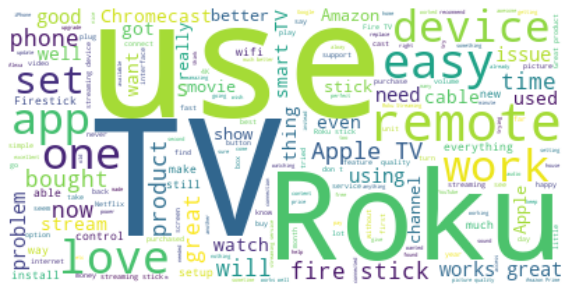

In [31]:
# Create a text 
all_text = " ".join(review for review in df.review_text)
print ("There are {} words in the combination of all review.".format(len(all_text)))

# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(all_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Amazon Fire TV Stick Reviews word cloud**

There are 636640 words in the combination of all review.


(-0.5, 399.5, 199.5, -0.5)

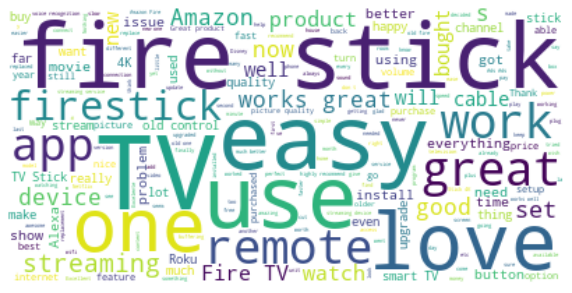

In [32]:
# Create a word cloud for amazon product
amazon = ['Amazon Fire TV Stick']
amazon_reviews = df[df['product'].isin(amazon)]
amazon_text = " ".join(review for review in amazon_reviews.review_text)
print ("There are {} words in the combination of all review.".format(len(amazon_text)))

# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(amazon_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Google ChromeCast Reviews Word Cloud**

There are 737727 words in the combination of all review.


(-0.5, 399.5, 199.5, -0.5)

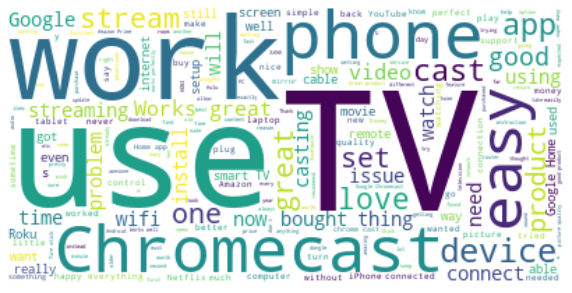

In [33]:
# Create a word cloud for google product
google = ['Google ChromeCast']
google_reviews = df[df['product'].isin(google)]
google_text = " ".join(review for review in google_reviews.review_text)
print ("There are {} words in the combination of all review.".format(len(google_text)))

# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(google_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Roku Remote Reviews Word Cloud**

There are 1519340 words in the combination of all review.


(-0.5, 399.5, 199.5, -0.5)

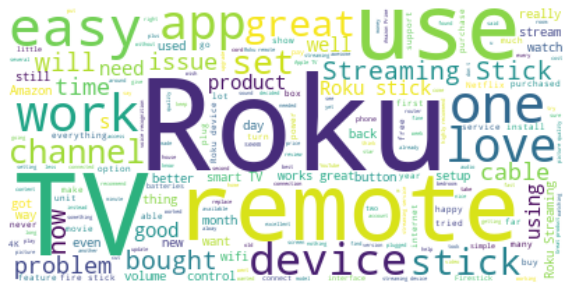

In [34]:
# Create a word cloud for roku product
roku = ['Roku Remote']
roku_reviews = df[df['product'].isin(roku)]
roku_text = " ".join(review for review in roku_reviews.review_text)
print ("There are {} words in the combination of all review.".format(len(roku_text)))

# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(roku_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Apple TV Reviews Word Cloud**

There are 763811 words in the combination of all review.


(-0.5, 399.5, 199.5, -0.5)

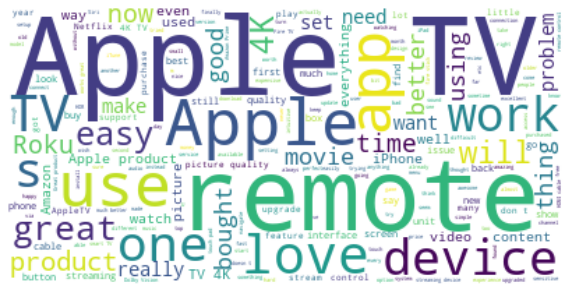

In [35]:
# Create a word cloud for apple product
apple = ['Apple TV']
apple_reviews = df[df['product'].isin(apple)]
apple_text = " ".join(review for review in apple_reviews.review_text)
print ("There are {} words in the combination of all review.".format(len(apple_text)))

# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(apple_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()